In [1]:
import numpy as np
import sys
sys.path.append('../Python')
# The Primakoff calculation refers to /Python/Primakoff.py
from Primakoff import Primakoff

import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import rcParams
from matplotlib import colors as mplcolors

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rcParams['text.usetex'] = True
rcParams['text.latex.unicode'] = True
plt.rcParams.update({'font.size': 20})
rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
from matplotlib.collections import LineCollection

/sw/arcts/centos7/python3.7-anaconda/2019.07/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  del sys.path[0]


In [2]:
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rcParams['text.usetex'] = True
rcParams['text.latex.unicode'] = True
plt.rcParams.update({'font.size': 20})
rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
from matplotlib.collections import LineCollection

/sw/arcts/centos7/python3.7-anaconda/2019.07/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  This is separate from the ipykernel package so we can avoid doing imports until


# Load in data

All units cgs unless otherwise indicated.

In [3]:
# Load in for plotting logT-logRho plane
Degeneracy_Zones = np.load('../Data/Degeneracy_Zones.npz')
log_Rho_DND = Degeneracy_Zones['log_Rho_DND']
log_T_DND = Degeneracy_Zones['log_T_DND']
log_Rho_NDrad = Degeneracy_Zones['log_Rho_NDrad']
log_T_NDrad = Degeneracy_Zones['log_T_NDrad']

# Load History
Star_History = np.load('../Data/Star_History.npz')
Age_yr = Star_History['Age_yr']
Mass_Solar = Star_History['Mass_Solar']
Radius_Solar = Star_History['Radius_Solar']
log_Tcore = Star_History['log_Tcore']
log_Rhocore = Star_History['log_Rhocore']
log_Lcno = Star_History['log_Lcno']
log_L3alpha = Star_History['log_L3alpha']
log_Teff = Star_History['log_Teff']
log_L_Solar = Star_History['log_L_Solar']
Center_H = Star_History['Center_H']
Center_He = Star_History['Center_He']
Center_C = Star_History['Center_C']
Center_O = Star_History['Center_O']
Surface_H = Star_History['Surface_H']
Surface_He = Star_History['Surface_He']
Surface_C = Star_History['Surface_C']
Surface_O = Star_History['Surface_O']

# Load Profiles
Star_Profiles = np.load('../Data/Star_Profiles.npz',allow_pickle=True,encoding='latin1')
Event=Star_Profiles['Event']
T_Profiles=Star_Profiles['T_Profiles']
R_Profiles=Star_Profiles['R_Profiles']
dR_Profiles=Star_Profiles['dR_Profiles']
Rho_Profiles=Star_Profiles['Rho_Profiles']
X_Profiles=Star_Profiles['X_Profiles']
Y_Profiles=Star_Profiles['Y_Profiles']
Z_C_Profiles=Star_Profiles['Z_C_Profiles']
Z_O_Profiles=Star_Profiles['Z_O_Profiles']
Z_Ne_Profiles=Star_Profiles['Z_Ne_Profiles']

# Definitions

In [4]:
# Models of Interest
Age_3Myr_idx = np.searchsorted(Age_yr,3.0e6)
WNh_start_idx = np.where(Surface_H < 0.4)[0][0]
WN_start_idx = np.where(Surface_H < 0.05)[0][0]
WC_start_idx = np.where(Surface_C > 0.02)[0][0]
WO_start_idx = np.where(Surface_O > 0.02)[0][0]
He_ignition_idx = np.where(log_L3alpha > 1)[0][0]

# Misc
Yr_To_End = (Age_yr[-1]-Age_yr)
Age_Myr = Age_yr/1.0e6

# MESA Plots Reproduction

## From Supplementary Material I.B.

### Fig. S1 Left

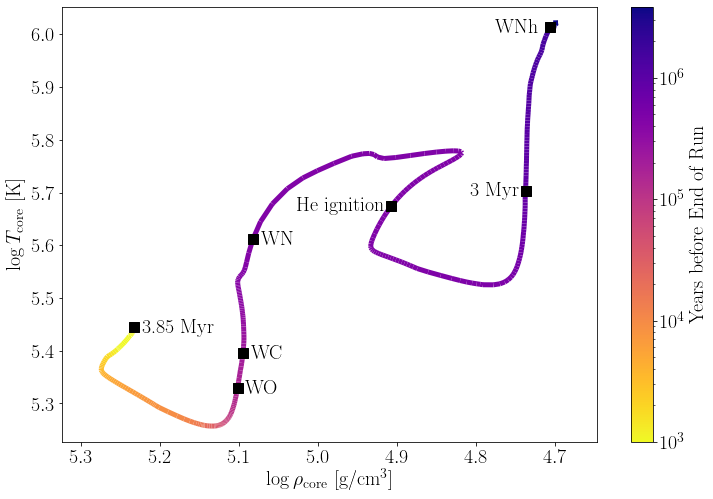

In [5]:
Yr_To_End = (Age_yr[-1]-Age_yr)
# Stop Coloring at 10^3 years
color = Yr_To_End.copy()
color[np.where(Yr_To_End < 10**3)] = 10.0**3

cmap = plt.cm.plasma_r

plt.figure(figsize=(12,8))

ax = plt.gca()
fig = plt.gcf()

# Create Line Colored by Yr_To_End
x_plot = log_Teff
y_plot = log_L_Solar
points = np.array([x_plot, y_plot]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=cmap, norm=mplcolors.LogNorm(), zorder=-1)
lc.set_array(color)
lc.set_linewidth(5)
line = ax.add_collection(lc)
fig.colorbar(line, ax=ax, label = 'Years before End of Run')
dxedge = 0.05
dyedge = 0.03
ax.set_xlim(x_plot.min() - dxedge, x_plot.max() + dxedge)
ax.set_ylim(y_plot.min() - dyedge, y_plot.max() + dyedge)

# Plot Points of Interest
x_text_offset = .1
y_text_offset = -0.05
ax.scatter(x_plot[WNh_start_idx],y_plot[WNh_start_idx],s=100,marker='s',color='black')
ax.text(x_plot[WNh_start_idx]+0.07,y_plot[WNh_start_idx]-0.01,'WNh')
ax.scatter(x_plot[Age_3Myr_idx],y_plot[Age_3Myr_idx],s=100,marker='s',color='black')
ax.text(x_plot[Age_3Myr_idx]+0.07,y_plot[Age_3Myr_idx]-0.01,'3 Myr')
ax.scatter(x_plot[He_ignition_idx],y_plot[He_ignition_idx],s=100,marker='s',color='black')
ax.text(x_plot[He_ignition_idx]+0.12,y_plot[He_ignition_idx]-0.01,'He ignition')
ax.scatter(x_plot[WN_start_idx],y_plot[WN_start_idx],s=100,marker='s',color='black')
ax.scatter(x_plot[WC_start_idx],y_plot[WC_start_idx],s=100,marker='s',color='black')
ax.scatter(x_plot[WO_start_idx],y_plot[WO_start_idx],s=100,marker='s',color='black')
ax.text(x_plot[WN_start_idx]-0.01,y_plot[WN_start_idx]-0.01,'WN')
ax.text(x_plot[WC_start_idx]-0.01,y_plot[WC_start_idx]-0.01,'WC')
ax.text(x_plot[WO_start_idx]-0.01,y_plot[WO_start_idx]-0.01,'WO')
ax.scatter(x_plot[-1],y_plot[-1],s=100,marker='s',color='black')
ax.text(x_plot[-1]-0.01,y_plot[-1]-0.01,'{:.2f} Myr'.format(float(Age_Myr[-1])))
plt.xlabel('$\\log\\rho_{\\rm core}$ [g/cm$^3$]')
plt.ylabel('$\\log T_{\\rm core}$ [K]')
ax.invert_xaxis()

### Fig. S1 Right

Text(0, 0.5, '$\\log T_{\\rm core}$ [K]')

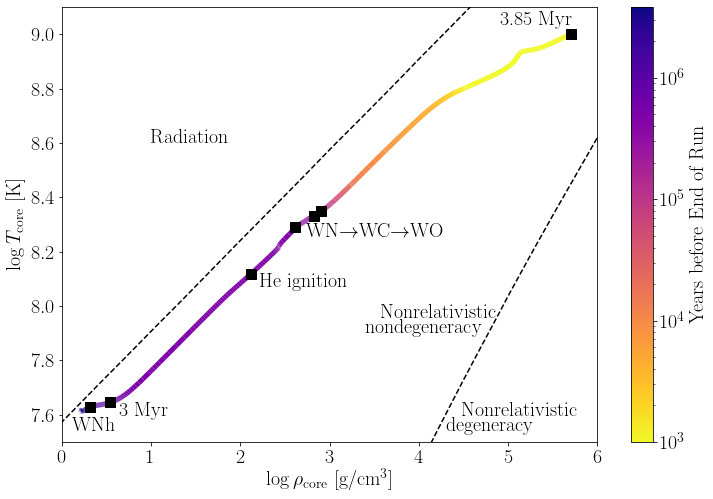

In [6]:
plt.figure(figsize=(12,8))

ax = plt.gca()
fig = plt.gcf()

# Create Line Colored by Yr_To_End
x_plot = log_Rhocore
y_plot = log_Tcore
points = np.array([x_plot, y_plot]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=cmap, norm=mplcolors.LogNorm(), zorder=-1)
lc.set_array(color)
lc.set_linewidth(5)
line = ax.add_collection(lc)
fig.colorbar(line, ax=ax, label = 'Years before End of Run')

# Degeneracy Zones
plt.plot(log_Rho_DND, log_T_DND,color='black',linestyle='--')
plt.plot(log_Rho_NDrad, log_T_NDrad,color='black',linestyle='--')
plt.text(1,8.6,'Radiation')
plt.text(3.4,7.9,
    r'Nonrelativistic \\'
    r'nondegeneracy'
        )
plt.text(4.3,7.54,
    r'Nonrelativistic \\'
    r'degeneracy'
        )

# Plot Points of Interest
x_text_offset = .1
y_text_offset = -0.05
ax.scatter(x_plot[WNh_start_idx],y_plot[WNh_start_idx],s=100,marker='s',color='black')
ax.text(x_plot[WNh_start_idx]-0.2,y_plot[WNh_start_idx]-0.09,'WNh')
ax.scatter(x_plot[Age_3Myr_idx],y_plot[Age_3Myr_idx],s=100,marker='s',color='black')
ax.text(x_plot[Age_3Myr_idx]+0.1,y_plot[Age_3Myr_idx]-0.05,'3 Myr')
ax.scatter(x_plot[He_ignition_idx],y_plot[He_ignition_idx],s=100,marker='s',color='black')
ax.text(x_plot[He_ignition_idx]+0.1,y_plot[He_ignition_idx]-0.05,'He ignition')
ax.scatter(x_plot[WN_start_idx],y_plot[WN_start_idx],s=100,marker='s',color='black')
ax.scatter(x_plot[WC_start_idx],y_plot[WC_start_idx],s=100,marker='s',color='black')
ax.scatter(x_plot[WO_start_idx],y_plot[WO_start_idx],s=100,marker='s',color='black')
ax.text(x_plot[WC_start_idx]-0.08,y_plot[WC_start_idx]-0.08,'WN$\\rightarrow$WC$\\rightarrow$WO')
ax.scatter(x_plot[-1],y_plot[-1],s=100,marker='s',color='black')
ax.text(x_plot[-1]-0.8,y_plot[-1]+0.03,'{:.2f} Myr'.format(float(Age_Myr[-1])))
plt.xlim(0,6)
plt.ylim(7.5,9.1)
plt.xlabel('$\\log\\rho_{\\rm core}$ [g/cm$^3$]')
plt.ylabel('$\\log T_{\\rm core}$ [K]')

### Fig. S2 Left

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


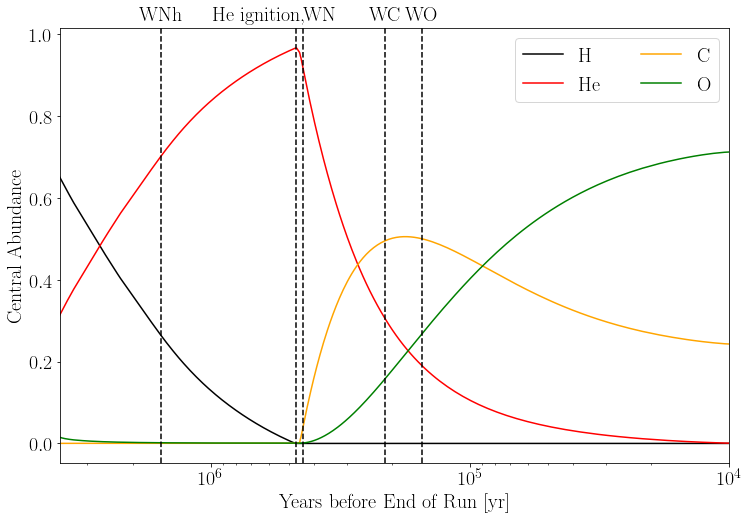

In [7]:
plt.figure(figsize=(12,8))
plt.plot(Yr_To_End,Center_H,label='H',color='k')
plt.plot(Yr_To_End,Center_He,label='He',color='r')
plt.plot(Yr_To_End,Center_C,label='C',color='orange')
plt.plot(Yr_To_End,Center_O,label='O',color='g')
plt.axvline(Yr_To_End[WNh_start_idx],color='black',linestyle='--')
plt.axvline(Yr_To_End[He_ignition_idx],color='black',linestyle='--')
plt.axvline(Yr_To_End[WN_start_idx],color='black',linestyle='--')
plt.axvline(Yr_To_End[WC_start_idx],color='black',linestyle='--')
plt.axvline(Yr_To_End[WO_start_idx],color='black',linestyle='--')
y_text = 1.047
plt.text(Yr_To_End[WNh_start_idx],y_text,'WNh',horizontalalignment='center',verticalalignment='center')
plt.text(Yr_To_End[He_ignition_idx]/1.1,y_text,'He ignition,',horizontalalignment='right',verticalalignment='center')
plt.text(Yr_To_End[WN_start_idx],y_text,'WN',horizontalalignment='left',verticalalignment='center')
plt.text(Yr_To_End[WC_start_idx],y_text,'WC',horizontalalignment='center',verticalalignment='center')
plt.text(Yr_To_End[WO_start_idx],y_text,'WO',horizontalalignment='center',verticalalignment='center')
plt.xlabel('Years before End of Run [yr]')
plt.xscale('log')
plt.xlim(10**4,Yr_To_End[0])
plt.gca().invert_xaxis()
plt.ylabel('Central Abundance')
plt.legend(loc='upper right',ncol=2)

### Fig. S2 Right

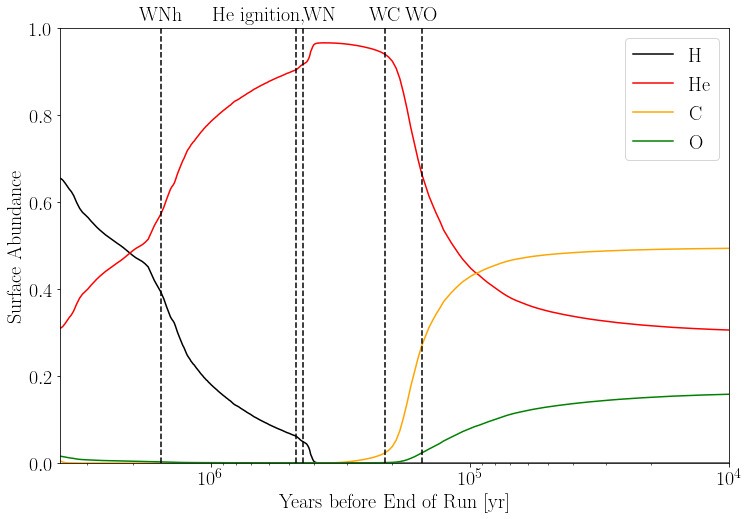

In [8]:
plt.figure(figsize=(12,8))
plt.plot(Yr_To_End,Surface_H,label='H',color='k')
plt.plot(Yr_To_End,Surface_He,label='He',color='r')
plt.plot(Yr_To_End,Surface_C,label='C',color='orange')
plt.plot(Yr_To_End,Surface_O,label='O',color='g')
plt.axvline(Yr_To_End[WNh_start_idx],color='black',linestyle='--')
plt.axvline(Yr_To_End[He_ignition_idx],color='black',linestyle='--')
plt.axvline(Yr_To_End[WN_start_idx],color='black',linestyle='--')
plt.axvline(Yr_To_End[WC_start_idx],color='black',linestyle='--')
plt.axvline(Yr_To_End[WO_start_idx],color='black',linestyle='--')
y_text = 1.03
plt.text(Yr_To_End[WNh_start_idx],y_text,'WNh',horizontalalignment='center',verticalalignment='center')
plt.text(Yr_To_End[He_ignition_idx]/1.1,y_text,'He ignition,',horizontalalignment='right',verticalalignment='center')
plt.text(Yr_To_End[WN_start_idx],y_text,'WN',horizontalalignment='left',verticalalignment='center')
plt.text(Yr_To_End[WC_start_idx],y_text,'WC',horizontalalignment='center',verticalalignment='center')
plt.text(Yr_To_End[WO_start_idx],y_text,'WO',horizontalalignment='center',verticalalignment='center')
plt.xlabel('Years before End of Run [yr]')
plt.xscale('log')
plt.xlim(10**4,Yr_To_End[0])
plt.ylim(0,1)
plt.gca().invert_xaxis()
plt.ylabel('Surface Abundance')
plt.legend(loc='upper right')

### Fig. S3 Left

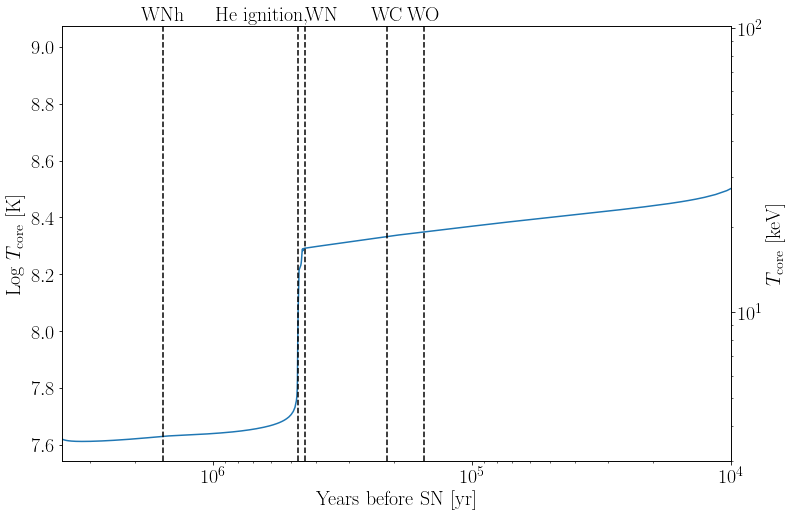

In [9]:
plt.figure(figsize=(12,8))

plt.plot(Yr_To_End,log_Tcore)

plt.axvline(Yr_To_End[WNh_start_idx],color='black',linestyle='--')
plt.axvline(Yr_To_End[He_ignition_idx],color='black',linestyle='--')
plt.axvline(Yr_To_End[WN_start_idx],color='black',linestyle='--')
plt.axvline(Yr_To_End[WC_start_idx],color='black',linestyle='--')
plt.axvline(Yr_To_End[WO_start_idx],color='black',linestyle='--')
y_text = 9.11
plt.text(Yr_To_End[WNh_start_idx],y_text,'WNh',horizontalalignment='center',verticalalignment='center')
plt.text(Yr_To_End[He_ignition_idx]/1.1,y_text,'He ignition,',horizontalalignment='right',verticalalignment='center')
plt.text(Yr_To_End[WN_start_idx],y_text,'WN',horizontalalignment='left',verticalalignment='center')
plt.text(Yr_To_End[WC_start_idx],y_text,'WC',horizontalalignment='center',verticalalignment='center')
plt.text(Yr_To_End[WO_start_idx],y_text,'WO',horizontalalignment='center',verticalalignment='center')


plt.xlabel('Years before SN [yr]')
plt.xscale('log')
plt.xlim(10**4,Yr_To_End[0])
plt.gca().invert_xaxis()
plt.ylabel('Log $T_{\\rm core}$ [K]')

ax1 = plt.gca()
ax2 = ax1.twinx()
mn, mx = ax1.get_ylim()
logK2keV = 0.086/1e6
ax2.set_ylim(10**mn*logK2keV, 10**mx*logK2keV)
ax2.set_ylabel('$T_{\\rm core}$ [keV]')
ax2.set_yscale('log')

### Fig. S3 Right

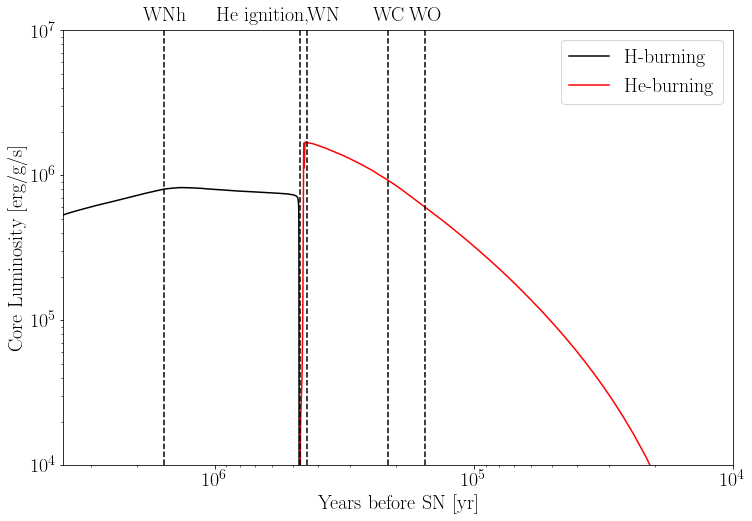

In [10]:
plt.figure(figsize=(12,8))
plt.plot(Yr_To_End,10**log_Lcno,label='H-burning',color='k')
plt.plot(Yr_To_End,10**log_L3alpha,label='He-burning',color='r')

plt.axvline(Yr_To_End[WNh_start_idx],color='black',linestyle='--')
plt.axvline(Yr_To_End[He_ignition_idx],color='black',linestyle='--')
plt.axvline(Yr_To_End[WN_start_idx],color='black',linestyle='--')
plt.axvline(Yr_To_End[WC_start_idx],color='black',linestyle='--')
plt.axvline(Yr_To_End[WO_start_idx],color='black',linestyle='--')
y_text = 1.26e7
plt.text(Yr_To_End[WNh_start_idx],y_text,'WNh',horizontalalignment='center',verticalalignment='center')
plt.text(Yr_To_End[He_ignition_idx]/1.1,y_text,'He ignition,',horizontalalignment='right',verticalalignment='center')
plt.text(Yr_To_End[WN_start_idx],y_text,'WN',horizontalalignment='left',verticalalignment='center')
plt.text(Yr_To_End[WC_start_idx],y_text,'WC',horizontalalignment='center',verticalalignment='center')
plt.text(Yr_To_End[WO_start_idx],y_text,'WO',horizontalalignment='center',verticalalignment='center')

plt.xlabel('Years before SN [yr]')
plt.xscale('log')
plt.xlim(10**4,Yr_To_End[0])
plt.gca().invert_xaxis()
plt.ylim(1e4,1e7)
plt.yscale('log')
plt.ylabel('Core Luminosity [erg/g/s]')
plt.legend(loc='upper right')

### Fig. S4

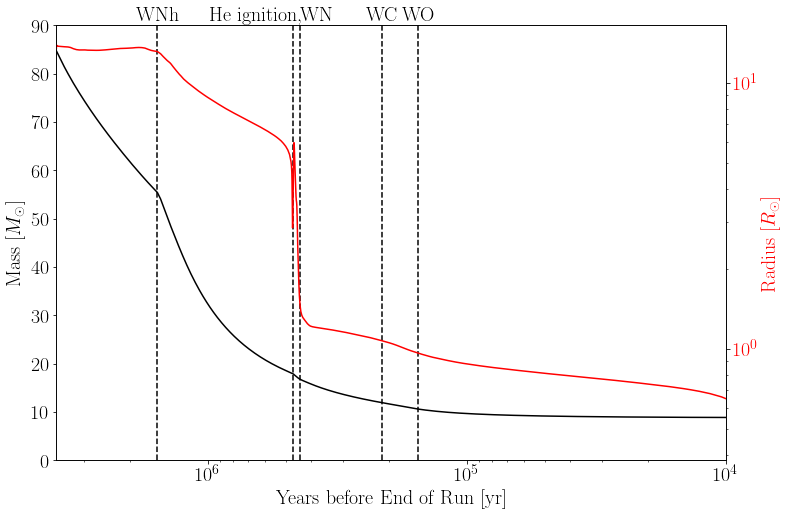

In [11]:
fig, ax1 = plt.subplots(figsize=(12,8))
color = 'black'
ax1.set_xlabel('Years before End of Run [yr]')
ax1.set_ylabel('Mass [$M_\odot$]', color=color)
ax1.plot(Yr_To_End,Mass_Solar, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0,90)
plt.xscale('log')
plt.xlim(10**4,Yr_To_End[0])
plt.gca().invert_xaxis()

plt.axvline(Yr_To_End[WNh_start_idx],color='black',linestyle='--')
plt.axvline(Yr_To_End[He_ignition_idx],color='black',linestyle='--')
plt.axvline(Yr_To_End[WN_start_idx],color='black',linestyle='--')
plt.axvline(Yr_To_End[WC_start_idx],color='black',linestyle='--')
plt.axvline(Yr_To_End[WO_start_idx],color='black',linestyle='--')
y_text = 92
plt.text(Yr_To_End[WNh_start_idx],y_text,'WNh',horizontalalignment='center',verticalalignment='center')
plt.text(Yr_To_End[He_ignition_idx]/1.1,y_text,'He ignition,',horizontalalignment='right',verticalalignment='center')
plt.text(Yr_To_End[WN_start_idx],y_text,'WN',horizontalalignment='left',verticalalignment='center')
plt.text(Yr_To_End[WC_start_idx],y_text,'WC',horizontalalignment='center',verticalalignment='center')
plt.text(Yr_To_End[WO_start_idx],y_text,'WO',horizontalalignment='center',verticalalignment='center')

ax2 = ax1.twinx() 

color = 'red'
ax2.set_ylabel('Radius [$R_\odot$]', color=color)
ax2.plot(Yr_To_End,Radius_Solar, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_yscale('log')
plt.gca().invert_xaxis()

## From Supplementary Material I.C.

In [12]:
Ens = np.logspace(-1,3,1001) # keV
g_agg = 1e-12 # GeV^-1
Rsol2cm = 6.957e10 # Rsol -> cm
Labels = ['WNh','3 Myr','He ignition','WN','WC','WO']
Colors = ['r','orange','gold','g','b','purple']

Axion_Spectra = np.zeros((len(Event),len(Ens)))

for iE,Event_Name in enumerate(Event):
    Luminosity_Grid = Primakoff(Ens[:,None],g_agg,R_Profiles[iE][None,:],dR_Profiles[iE][None,:],\
                                    Rho_Profiles[iE][None,:],T_Profiles[iE][None,:],\
                                    X_Profiles[iE][None,:],Y_Profiles[iE][None,:],Z_C_Profiles[iE][None,:],\
                                    Z_O_Profiles[iE][None,:],Z_Ne_Profiles[iE][None,:])
    Axion_Spectra[iE] = np.sum(Luminosity_Grid,axis=1) # Sum over Spatial Zones


In [13]:
# WC phase specifically
iE = 4
WC_Temperature_Profile = T_Profiles[iE]
WC_Radial_Profile = R_Profiles[iE]
WC_Zone_Width_Profile = dR_Profiles[iE]
WC_Luminosity_Grid = Primakoff(Ens[:,None],g_agg,R_Profiles[iE][None,:],dR_Profiles[iE][None,:],\
                                    Rho_Profiles[iE][None,:],T_Profiles[iE][None,:],\
                                    X_Profiles[iE][None,:],Y_Profiles[iE][None,:],Z_C_Profiles[iE][None,:],\
                                    Z_O_Profiles[iE][None,:],Z_Ne_Profiles[iE][None,:])
Volume_Profile = 4*np.pi*(WC_Radial_Profile*Rsol2cm)**2*WC_Zone_Width_Profile
WC_Luminosity_Profile = np.trapz(WC_Luminosity_Grid,Ens,axis=0)/Volume_Profile

### Fig. 5 Left

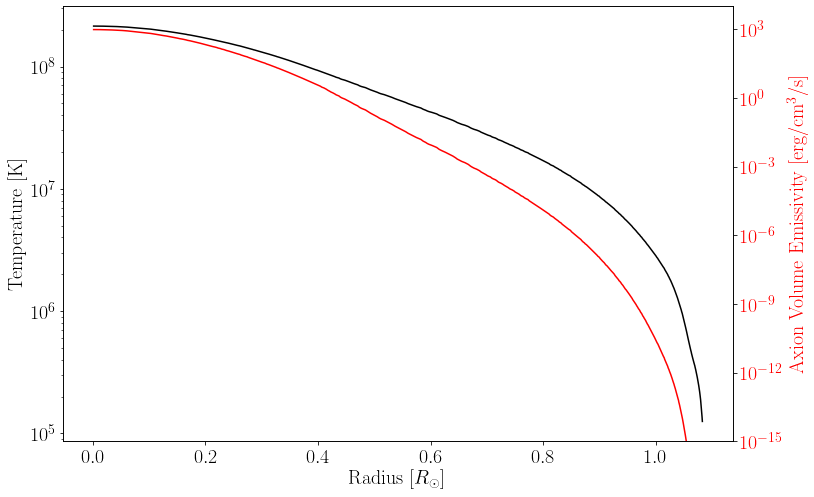

In [14]:
fig, ax1 = plt.subplots(figsize=(12,8))
color = 'black'
ax1.set_xlabel('Radius [$R_\odot$]')
ax1.set_ylabel('Temperature [K]', color=color)
ax1.plot(WC_Radial_Profile,WC_Temperature_Profile, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_yscale('log')

ax2 = ax1.twinx()

color = 'red'
ax2.set_ylabel('Axion Volume Emissivity [erg/cm$^3$/s]', color=color)
ax2.plot(WC_Radial_Profile,WC_Luminosity_Profile, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(1e-15,1e4)
ax2.set_yscale('log')

### Fig. 5 Right

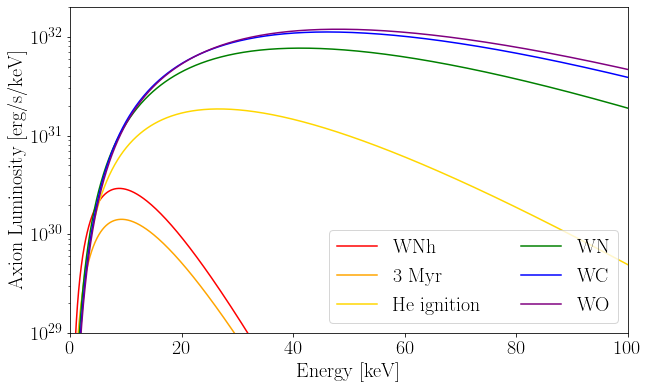

In [15]:
plt.figure(figsize=(10,6))
for iE,Event_Name in enumerate(Labels):
    plt.plot(Ens,Axion_Spectra[iE],label=Event_Name,color=Colors[iE])

plt.xlim(0,100)
plt.xlabel('Energy [keV]')
plt.ylim(1e29,2e32)
plt.yscale('log')
plt.ylabel('Axion Luminosity [erg/s/keV]')
plt.legend(loc='lower right',ncol=2)